In [4]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut # 数据集划分方法
from sklearn.model_selection import cross_val_score,cross_validate # 计算交叉验证下的测试误差
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors

一元回归模型的截距项:0.955268
一元回归模型的回归系数: [60.58696023]


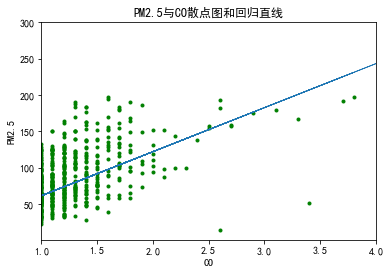

In [5]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
data=data.loc[(data['PM2.5']<=200) & (data['SO2']<=20)]

###一元回归
X=data[['CO']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("一元回归模型的截距项:%f"%modelLR.intercept_)
print("一元回归模型的回归系数:",modelLR.coef_)
plt.scatter(data['CO'],data['PM2.5'],c='green',marker='.')
plt.title('PM2.5与CO散点图和回归直线')
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.xlim(xmax=4, xmin=1)
plt.ylim(ymax=300,ymin=1)
plt.plot(data['CO'],modelLR.predict(X),linewidth=0.8)
plt.show()


In [6]:
##多元回归
X=data[['SO2','CO']]
y=data['PM2.5']
modelLR=LM.LinearRegression()
modelLR.fit(X,y)
print("多元回归模型的截距项:%f"%modelLR.intercept_)
print("多元回归模型的回归系数:",modelLR.coef_)

多元回归模型的截距项:-1.249076
多元回归模型的回归系数: [ 0.85972339 56.85521851]


说明：
1、这里以空气质量监测的部分数据为例，对PM2.5（输出变量）进行预测。首先考虑只有一个输入变量CO的情况，建立一元线性回归模型。然后，研究SO2和CO对PM2.5的影响，建立多元线性回归模型。
2、建立线性回归模型需引用sklearn中的linear_model。首先，modelLR=LM.LinearRegression()定义modelLR对象为线性模型；然后，modelLR.fit(X,y)表示基于给出的X和y估计模型参数。其中，X为输入变量（矩阵形式），y为输出变量。最后，modelLR.predict(X)表示将X带入回归方程计算y的预测值。
3、线性回归模型参数的估计值存储在intercept_和.coef_属性中，依次为截距项和回归系数。
4、在研究CO对PM2.5的影响时，CO的回归系数估计值（60.59）大于0，表示其他因素不变条件下，CO浓度增加一个单位将导致PM2.5均值增加60.59。
5、在研究SO2和CO对PM2.5的影响时，CO的回归系数估计值（56.86）大于SO2（0.86），表明CO对PM2.5的正向贡献大于SO2。

0    1204
1     892
Name: 有无污染, dtype: int64
截距项:-4.858429
回归系数: [[0.05260358 0.01852681]]
优势比[[1.05401173 1.0186995 ]]
预测结果： [0 1 0 ... 0 0 0]


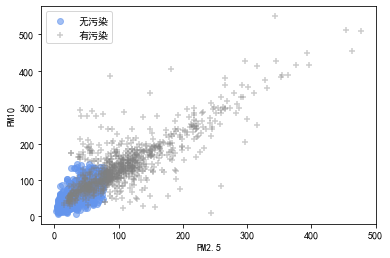

In [7]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
data['有无污染']=data['质量等级'].map({'优':0,'良':0,'轻度污染':1,'中度污染':1,'重度污染':1,'严重污染':1})
print(data['有无污染'].value_counts())

fig = plt.figure()
ax = fig.add_subplot(111)
flag=(data['有无污染']==0)
ax.scatter(data.loc[flag,'PM2.5'],data.loc[flag,'PM10'],c='cornflowerblue',marker='o',label='无污染',alpha=0.6)
flag=data['有无污染']==1
ax.scatter(data.loc[flag,'PM2.5'],data.loc[flag,'PM10'],c='grey',marker='+',label='有污染',alpha=0.4)
ax.set_xlabel('PM2.5')
ax.set_ylabel('PM10')
plt.legend()

##Logistic回归
X=data[['PM2.5','PM10']]
y=data['有无污染']
modelLR=LM.LogisticRegression()
modelLR.fit(X,y)
print("截距项:%f"%modelLR.intercept_)
print("回归系数:",modelLR.coef_)
print("优势比{0}".format(np.exp(modelLR.coef_)))
yhat=modelLR.predict(X)
print("预测结果：",yhat)


说明：
1、这里以空气质量监测数据为例，对是否有污染（二分类输出变量）进行预测。首先对数据进行预处理，将质量等级是优和良的合并为0类（无污染）共计1204天。其余合并为1类（有污染）共计892天。这里只考虑PM2.5和PM10对有无污染的影响，作为输入变量，只有0和1两个取值的有无污染作为输出变量。建立Logistic回归模型。
2、首先，modelLR=LM.LogisticRegression()定义modelLR对象为Logistic回归模型；然后，modelLR.fit(X,y)表示基于给出的X和y估计模型参数。其中，X为输入变量（矩阵形式），y为输出变量。
3、模型参数的估计值存储在intercept_和.coef_属性中，依次为截距项和回归系数。从回归系数估计值看，PM2.5（系数为0.05）对是否有污染的作用比PM10（系数为0.02）更大。
4、modelLR.predict(X)表示将X带入回归方程计算y的预测值。
